# Linear Regression with sklearn

## <span style="color:red">Initial Notes</span>

**Advantages of Scikit-learn**
- incredible documentation
- variety
    - regression
    - classification
    - clustering
    - support vector machines
    - dimensionality reduction
    - LACKING IN: deep learning (TensorFlow, Keras, and PyTorch are better alternatives)
- numerical stability
    - when the numbers you are dealing with are too small or too big, your code may break

**Gameplan**
- Same examples, but with sklearn
- No old theory
- We will work with NumPy slightly more
- Syntax + new theory

## <span style="color:red">Simple linear regression</span>

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Load the data

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create the regression

#### Declare the dependent and independent variables

In [3]:
x = data['SAT']
y = data['GPA']

In [4]:
x.shape

(84,)

In [5]:
y.shape

(84,)

We must reshape into a matrix (2D object)

In [6]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

#### Regression itself

In [7]:
reg = LinearRegression()

'reg' is now an instance of the LinearRegression class

In [8]:
reg.fit(x_matrix,y)

LinearRegression()

In [9]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

**Parameter Comments:**

*normalize*
- STANDARDIZATION: the process of subtracting the mean and dividing by the standard deviation
    - a type of normalization
- NORMALIZATION: has a different meaning depending on the case
    - here: we subtract the mean, but divide by the L2-norm of the inputs
    
*copy_X*
- this is a safety net against normalization and other transformations
- sklearn creates copies automatically

*fit_intercept*
- in StatsModels we had to manually add the constant
- sklearn takes care of this when True

*n_jobs*
- a parameter used when we want to parallelize routines
- only 1 CPU used by default
    - some problems with lots of data may need more than 1 CPU

#### R-squared

In [10]:
reg.score(x_matrix,y)

0.40600391479679765

**Coefficients**

In [11]:
reg.coef_

array([0.00165569])

**Intercept**

In [12]:
reg.intercept_

0.27504029966028076

A simple linear regression always has a single intercept

**Making predictions**

reg.predict(new_inputs) 
- returns the predictions of the linear regression model for some new inputs

In [13]:
reg.predict([[1740]])

array([3.15593751])

In [14]:
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [15]:
reg.predict(new_data)

C:\Users\allensworthc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [16]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

C:\Users\allensworthc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


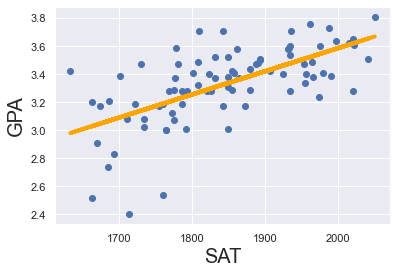

In [17]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## <span style="color:red">A note on normalization</span>

As explained in the lesson, the concept 'normalization' has different meanings in different contexts.

There are two materials which we find particularly useful:

1) The Wikipedia article on Feature scaling: https://en.wikipedia.org/wiki/Feature_scaling

2) This article on L1-norm and L2-norm: http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/



## <span style="color:red">Multiple linear regression</span>

### Load the data

In [19]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [20]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


- We already know that SAT is a good predictor of GPA.
- 'Rand 1,2,3' randomly assigned 1,2, or 3 to each sample
    - Sample is the machine learning word for observation

### Create the multiple linear regression

#### Declare the dependent and independent variables

In [21]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

#### Regression itself

In [22]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [23]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [24]:
reg.intercept_

0.29603261264909486

### Cacululating the R-squared
- The R-squared is a universal measure to evaluate how well linear regressions fare and compare
- reg.score(x,y) returns the R-sqaured of a linear regression

In [28]:
reg.score(x,y)

0.4066811952814283

- This is the R-sqaured value, not the adjusted R-squared value
- Adjusted R-squared is a much more appropriate measure for linear regression
    - The adjusted R-squared steps on the R-squared and adjusts for the number of variables included in the model
- There is no method in sklearn to get the adjusted R-squared

**We need a function/method that is not included in a package?**

    1. Google
    2. Use mad math skills

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [26]:
x.shape

(84, 2)

In [31]:
r2 = reg.score(x,y) # set r^2 value to a variable
n = x.shape[0] # the number of observations
p = x.shape[1] # the number of predictors

adj_r2 = 1 - (1-r2) * (n-1)/(n-p-1)

In [32]:
adj_r2

0.3920313482513401

## <span style="color:red">Feature Selction (F-regression)</span>

* Feature selection simplifies models, improves speed and prevents a series of unwanted issues arising from having too many features

**How can we find the p-value? (sklearn does not have a method)**

- feature_selection.f_regression
    - F-regression creates simple linear regressions of each feature and the dependent variable
    - Note:
        - For a simple linear regression, the p-value of F-stat = the p-value of the only independent variable

In [34]:
from sklearn.feature_selection import f_regression

In [35]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

There are two output arrays:

1. F-statistics
2. p-values (generally only interested in these)

In [37]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

This is scientific notation. e-11 = 10^-11=/10^11

In [38]:
p_values.round(3)

array([0.   , 0.676])

The first value refers to the p-value of the first x (SAT), the second refers to the p-value of the second x (Rand 1,2,3)

**Note:**

These are the univariate p-values reached from simple linear models. They do not reflect the interconnection of the features in our multiple linear regression.

## <span style="color:red">Creating a summary table</span>

In [39]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [41]:
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)

In [42]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


p-values are one of the best ways to determine if a variable is redundant, but they provide no information whatsoever about HOW USEFUL a variable is

## <span style="color:red">Feature Scaling (Standardization)</span>

- The process of transforming data into a standard scale
    - Subtracting the mean and dividing by the standard deviation

**Example**

- Three variables:
    - Days, Exchange Rate, Daily Trading Volume
    
Days = [1, 2, 3]

Exchange rate = [1.3, 1.34, 1.25]

Daily trading volume = [110,000, 98700, 135,000]

**Exchange rate**

    - mean: 1.3
    -std: 0.045
    
Standardized values:

    - 1.3 -> 0.07
    - 1.34 -> 0.96
    - 1.25 -> -1.03

**Daily trading volume**

    - 110,000 -> -0.25
    - 98,700 -> -0.85
    - 135,000 -> 1.1

We have forced the features to appear similar

## <span style="color:red">Feature selection through Standardization</span>

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [3]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


## Create the multiple linear regression

#### Declare the dependent and independent variables

In [4]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

## Standardization

**StandardScaler()** - a preprocessing module used to standardize (or scale) data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

'scaler' will be used to subtract the mean and divide by the standard deviation

In [7]:
scaler.fit(x)

StandardScaler()

**StandardScaler().transform(x)** - transforms the unscaled inputs using the information contained in the scaler object (feature-wise)

In [8]:
x_scaled = scaler.transform(x)

In [9]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with scaled features

In [10]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [11]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [12]:
reg.intercept_

3.330238095238095

## Creating a summary table

In [15]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [16]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


The bigger the weight, the bigger the impact.

    - the 'ML word' for intercept is 'bias'

When we perform feature scaling, we don't care if a useless variable is included.

- In general, it is preferred to leave out the worst performing features
    - they may bias the weights even if only slightly

## Making predictions with the standardized coefficients (weights)

In [19]:
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [20]:
reg.predict(new_data)

C:\Users\allensworthc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

The new data frame should be arranged in the same way... and also must be standardized in the same way

In [23]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [24]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

## What if we removed the 'Random 1,2,3' variable?

In [25]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,y)

LinearRegression()

In [26]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

Their weights will be so close to 0 that they will barely influence the predictions.

## <span style="color:red">Underfitting and Overfitting</span>

- **Overfitting** (high train accuracy)
    - Our training has focused on the particular training set so much, it has "missed the point"
    - low test accuracy
- **Underfitting** (low train accuracy)
    - The model has not captured the underlying logic of the data
    - low test accuracy

- **Good model**
    - captures the underlying logic of the dataset
    - high train accuracy
    - high test accuracy

## <span style="color:red">Train Test Split</span>

## Import the relevant libraries

In [27]:
import numpy as np

from sklearn.model_selection import train_test_split

## Generate some data we are going to split

In [28]:
a = np.arange(1,101)

In [29]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

**np.arange([start, ]stop, [step])** - returns evenly spaced values within a given interval. By default the output is an ndarray.

In [30]:
b = np.arange(501,601)

## Split the data

**train_test_split(x)** - splits arrays or matrices into random train and test subsets

In [31]:
train_test_split(a)

[array([99, 98, 72, 31, 22, 10, 60, 89, 73, 52, 26, 87, 12, 45, 48, 88, 96,
        75, 29, 49, 74,  1, 51, 46, 24, 66,  2, 28, 20, 97, 36, 85, 21, 78,
        86, 13, 18, 84, 35, 53,  9, 17, 58, 82, 92, 63, 70, 25,  8, 42, 15,
        67, 11, 39, 77, 32, 41, 91, 37, 43, 30, 38, 71, 27, 90, 19, 33,  4,
        14, 79, 44, 54, 61, 69, 83]),
 array([ 55,   3,  23,  64,  95,  80,  65,  76,  57,  47,  68,  34,   5,
         50,  62,  93,  40,  59,  81,   7,  94,  16, 100,  56,   6])]

In [36]:
a_train, a_test = train_test_split(a, test_size=0.2)

## Explore the result

In [37]:
a_train.shape, a_test.shape

((80,), (20,))

**Created an 80/20 split**

In [38]:
a_train

array([ 55,  58,  22,   8,  39,  98,  91,  15,  30,  99,  29,  36,  62,
        97,  87,  20,  75,  73,  67, 100,  85,  76,  72,  84,  25,   3,
        38,  24,  37,  50,  79,  88,  42,  56,  68,  47,  81,  65,   2,
        59,  94,  92,  86,  28,  16,  74,  10,  82,  17,  12,  71,  26,
        70,  54,  90,  44,  43,  21,  89,   9,  53,  51,  64,  45,  13,
        96,  48,  27,  49,  69,  19,  57,  77,  11,   1,  32,  52,  14,
        23,  80])

In [39]:
a_test

array([41, 63, 31, 40, 61, 35, 95,  5, 78,  6,  7, 34, 60, 18, 93, 46, 83,
       66, 33,  4])

Both arrays are shuffled!

**Sometimes the order of the array is of utmost importance**

In these cases, we prefer to split without being shuffled. (use shuffle argument)

In [40]:
a_train, a_test = train_test_split(a, test_size=0.2, shuffle=False)

In [41]:
a_train.shape, a_test.shape

((80,), (20,))

In [42]:
a_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [43]:
a_test

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

**Most of the time, we prefer to shuffle the data.**

In [47]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=365)

Each time we run the code, we get a different shuffle.

In [48]:
a_train

array([ 25,  32,  99,  73,  91,  66,   3,  59,  94,   1,   8,  15,  90,
        54,  31,  20,  77,  82,  30,  35,  95,  42,  38,   7,  11,  50,
        21,  48,   2,  17,  10,  58,  68,  43,  41,  16,  88,  72,  79,
       100,  80,  39,  24,  86,  22,  23,  62,  76,  18,  47,  55,  26,
        60,  19,  71,  64,  51,  63,  65,  28,  12,  78,  13,  44,  75,
        87,  40,   4,  29,  49,  37,  57,  27,  74,   6,  45,  92,  34,
        53,  83])

In [49]:
a_test

array([ 9, 69, 81, 56, 33, 93, 84, 61, 46, 89, 85, 67, 97,  5, 70, 36, 98,
       96, 14, 52])

The change in shuffle will likely change R^2 with 1% or 2% just because of the split.

In [50]:
b_train.shape, b_test.shape

((80,), (20,))

In [51]:
b_train

array([525, 532, 599, 573, 591, 566, 503, 559, 594, 501, 508, 515, 590,
       554, 531, 520, 577, 582, 530, 535, 595, 542, 538, 507, 511, 550,
       521, 548, 502, 517, 510, 558, 568, 543, 541, 516, 588, 572, 579,
       600, 580, 539, 524, 586, 522, 523, 562, 576, 518, 547, 555, 526,
       560, 519, 571, 564, 551, 563, 565, 528, 512, 578, 513, 544, 575,
       587, 540, 504, 529, 549, 537, 557, 527, 574, 506, 545, 592, 534,
       553, 583])

In [52]:
b_test

array([509, 569, 581, 556, 533, 593, 584, 561, 546, 589, 585, 567, 597,
       505, 570, 536, 598, 596, 514, 552])